# Plotting teams exploration of tradespace over the theoretical traedspace

First making sure that I can read the data (after switching computers and re-instantiating db)


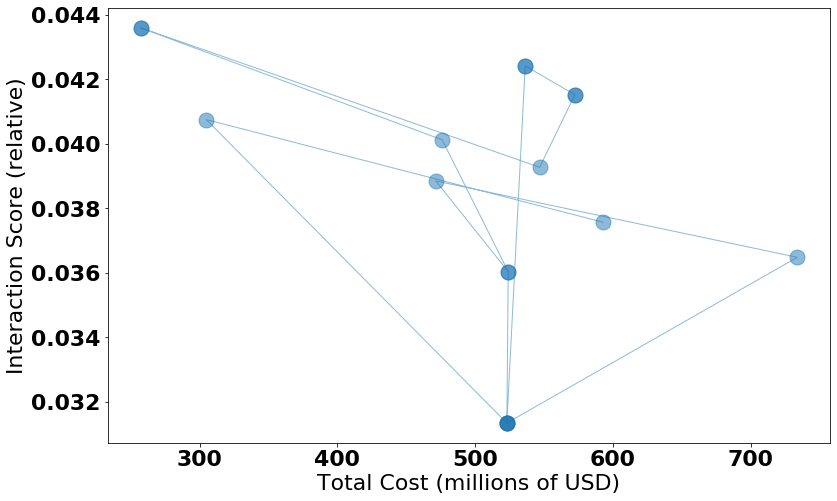

In [5]:
import sys
sys.path.append("../CommonModules") # go to parent dir/CommonModules

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

GOLDEN_RATIO = np.array([1.61803398875, 1])

import Learning2019GTL.Globals as Globals
import Learning2019GTL.DataConnector as DataConnector

team = DataConnector.Team()
ui_events = team.getSimulationUIEventsByTeamID(23)

team_cost        = list()
team_interaction = list()
for event in ui_events:
    team_cost.append(event.total_cost)
    team_interaction.append(event.interaction_score)

team_cost        = np.array(team_cost)
team_interaction = np.array(team_interaction)
    
plt.figure(figsize=GOLDEN_RATIO*8)

#plt.plot(totalCost, interactionScore, marker="o", linewidth=0, markersize=10, alpha=0.15, color='#7f7f7f')
plt.plot(team_cost, team_interaction/100.0, marker="o", linewidth=1, markersize=15, alpha=0.5)
plt.xlabel ('Total Cost (millions of USD)')
plt.ylabel ('Interaction Score (relative)')
plt.show()

# Working on the new 1-D plot

In [143]:
import os.path

DIMENSIONS = [
    'Total Cost (millions of USD)',
    'Interaction Score (relative)',
    'Diversity Score (relative)',
    'Walking Time (minutes)'
]


LIMITS = [
    [500, 1420],
    [3.7, 5.2],
    [0.0, 80.0],
    [230, 290]
]

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)


def plot_data(subplot, lims, data, dim, has_legend, team_id):
    
    # some parameters for graphing
    COMP_LEVEL = 30
    TEAM_LEVEL = 20
    MAX_LEVEL = 50
    
    fig = plt.subplot(subplot)
    plt.plot(lims, [COMP_LEVEL, COMP_LEVEL], linewidth=5)
    plt.plot([np.min(data), np.max(data)], [TEAM_LEVEL, TEAM_LEVEL], linewidth=5)
    plt.plot(data, np.ones(len(data))*TEAM_LEVEL, 'o', markersize=15, alpha=0.5)
    plt.ylim([0, MAX_LEVEL])
    plt.grid(True)
    plt.xlabel(dim)
    if has_legend:
        plt.legend(['Computational Range', f'Team {team_id} Range', f'Team {team_id} Sims'], 
                  fontsize=14, bbox_to_anchor=(0.652, 1.45, 0.0, 0.0), ncol=3)
    frame1 = plt.gca()
    frame1.axes.get_yaxis().set_visible(False)

def plot_team(team_id):
    
    team = DataConnector.Team()
    ui_events = team.getSimulationUIEventsByTeamID(team_id)
    team_cost        = list()
    team_interaction = list()
    team_walkingtime = list()
    team_diversity   = list()
    
    for event in ui_events:
        team_cost.append(event.total_cost)
        team_interaction.append(event.interaction_score)
        team_diversity.append(event.diversity_score)
        team_walkingtime.append(event.walking_time)

    team_cost        = np.array(team_cost)
    team_interaction = np.array(team_interaction)
    team_walkingtime = np.array(team_walkingtime)
    team_diversity   = np.array(team_diversity)
    
    fig = plt.figure(figsize=GOLDEN_RATIO*8)
    plot_data(411, LIMITS[0], team_cost, DIMENSIONS[0], True, team_id)
    plot_data(412, LIMITS[1], team_interaction, DIMENSIONS[1], False, team_id)
    plot_data(413, LIMITS[2], team_diversity, DIMENSIONS[2], False, team_id)
    plot_data(414, LIMITS[3], team_walkingtime, DIMENSIONS[3], False, team_id)
    
    fig.tight_layout()
    save_path = os.path.expanduser(f'~/Learning2019Data/out/Comparison1Dim-Team-{team_id:02d}.png')
    plt.savefig(save_path)
    plt.show()

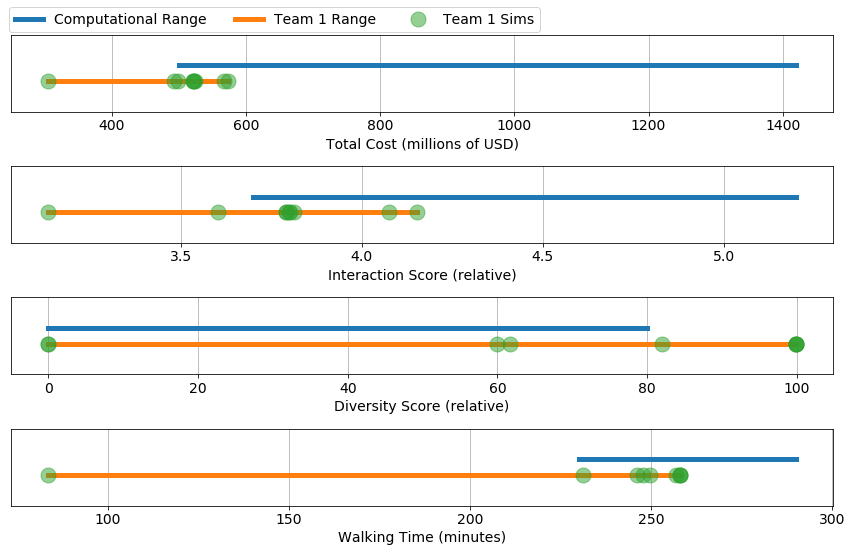

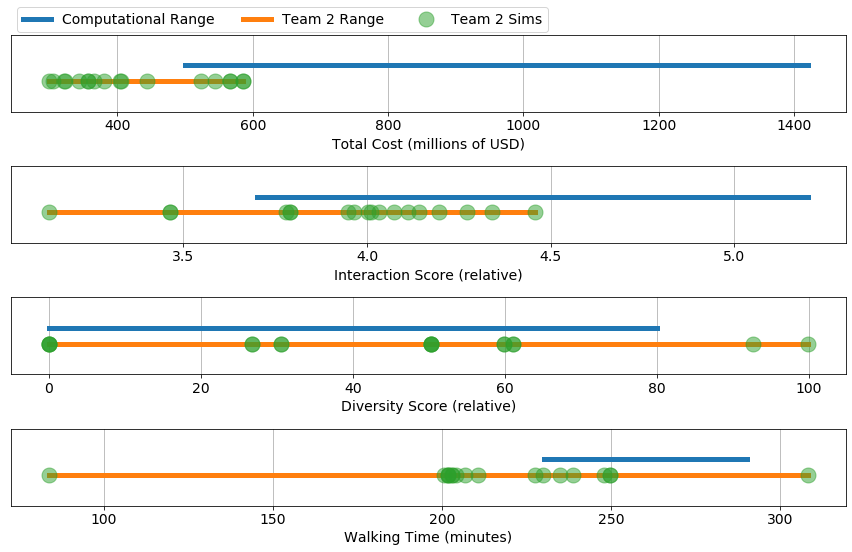

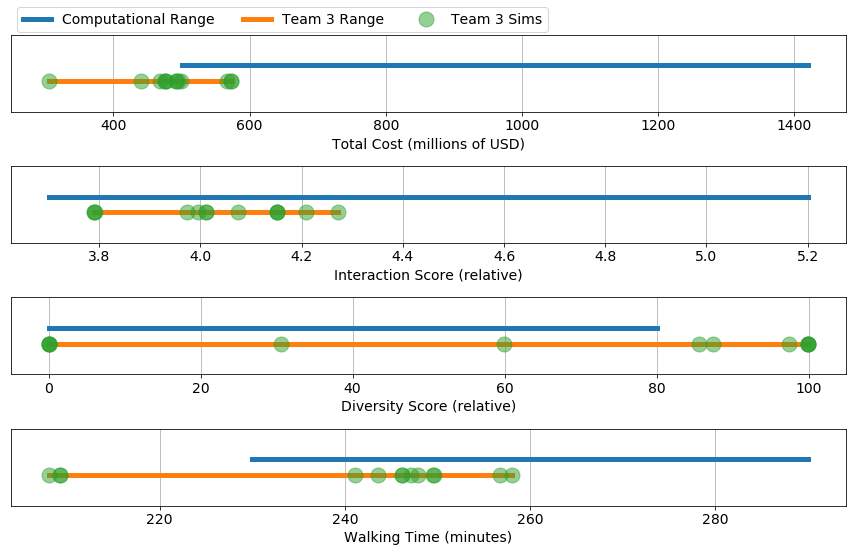

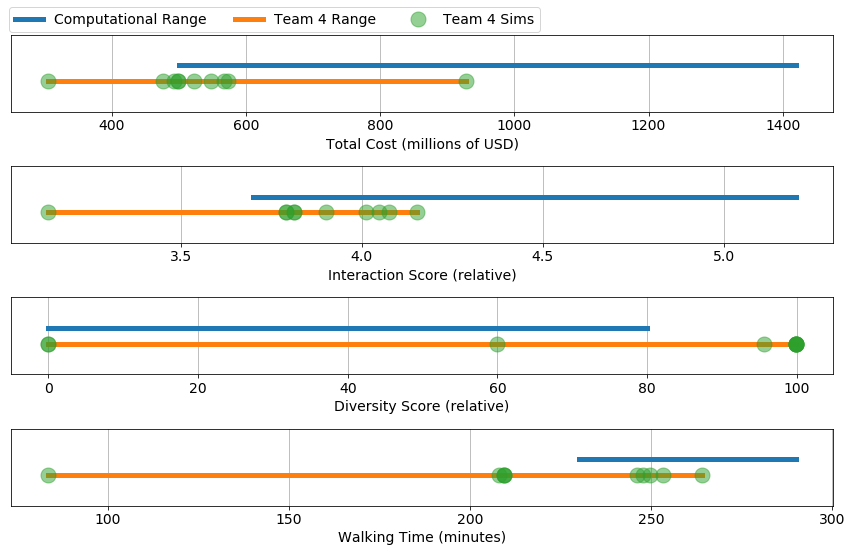

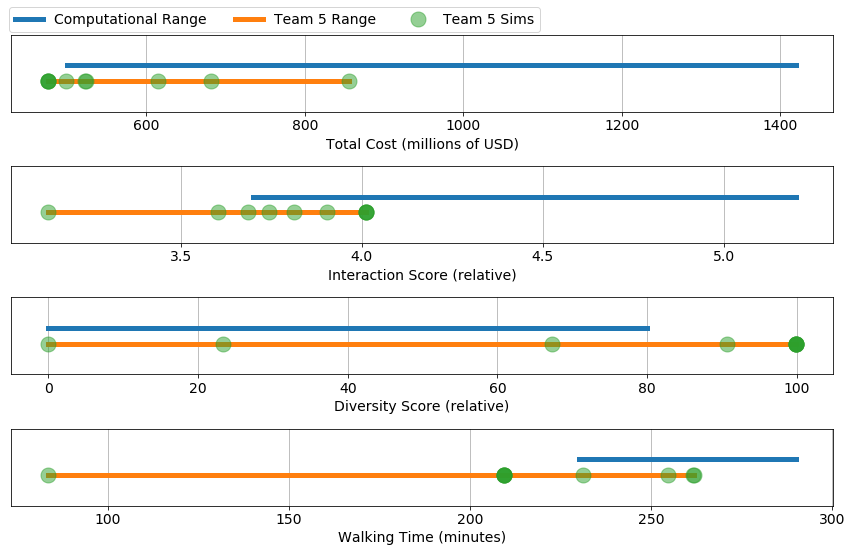

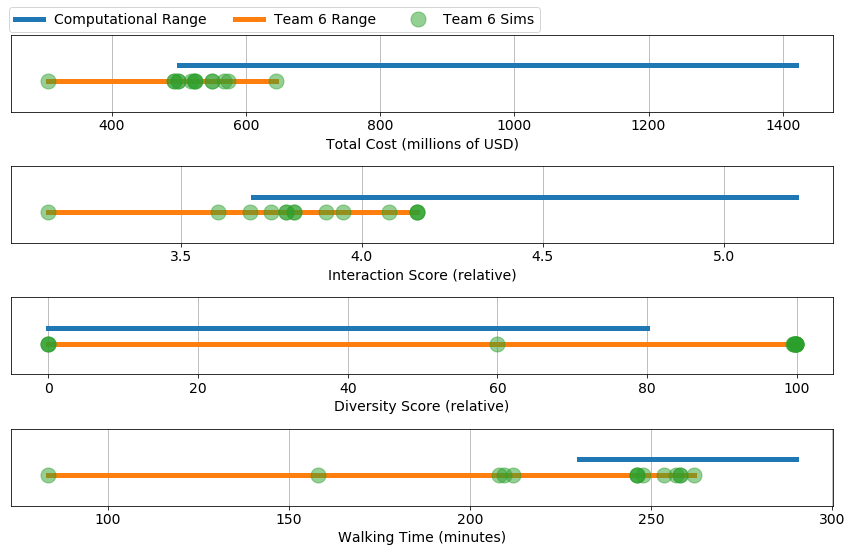

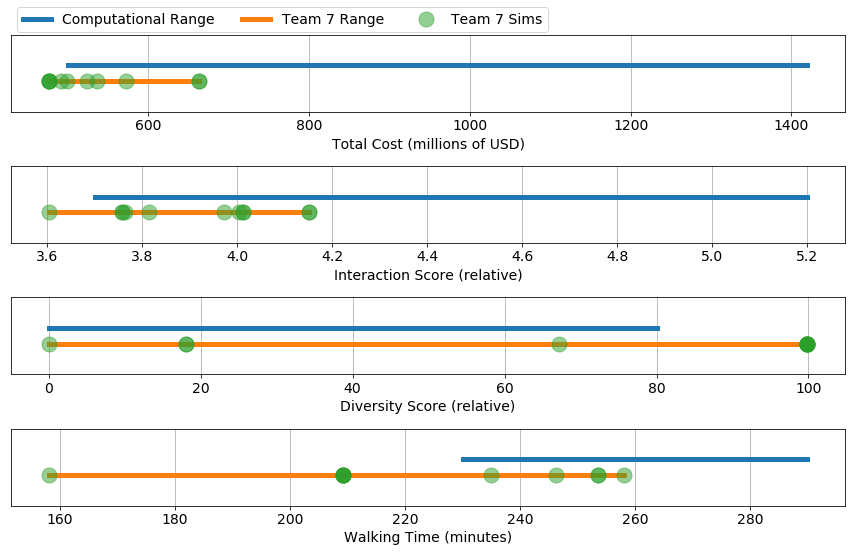

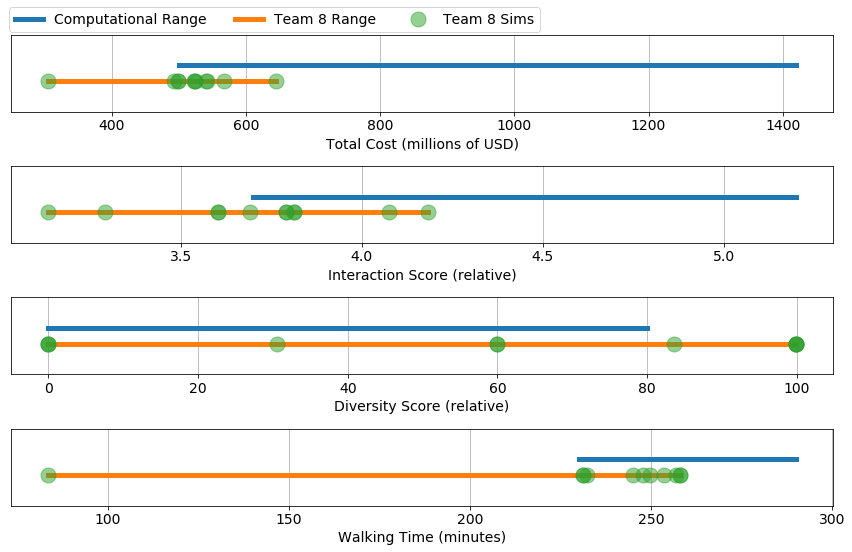

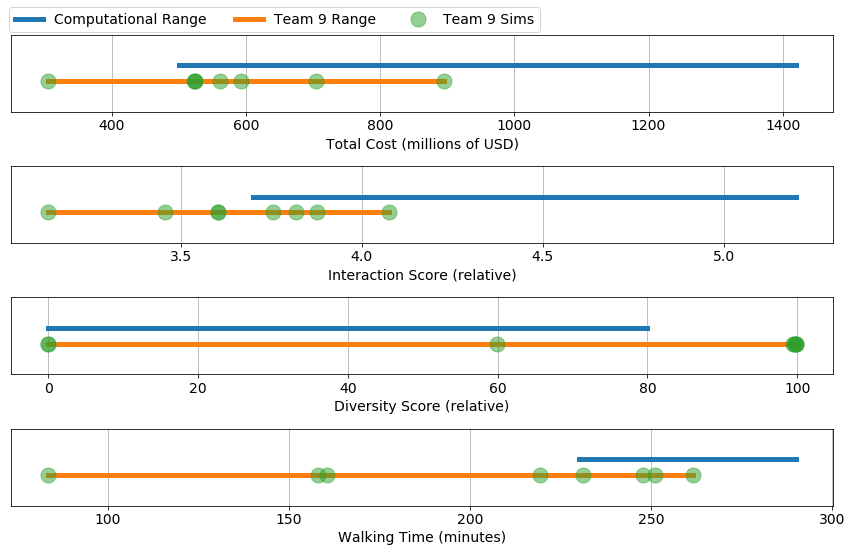

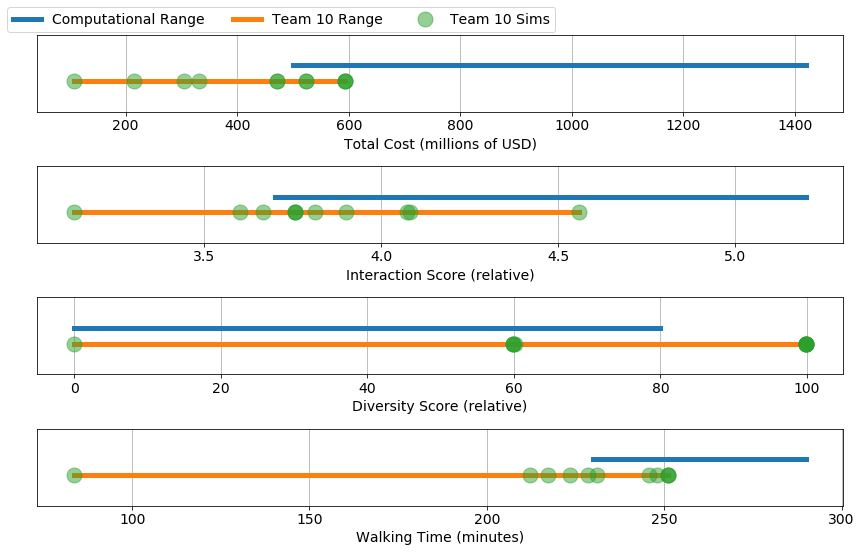

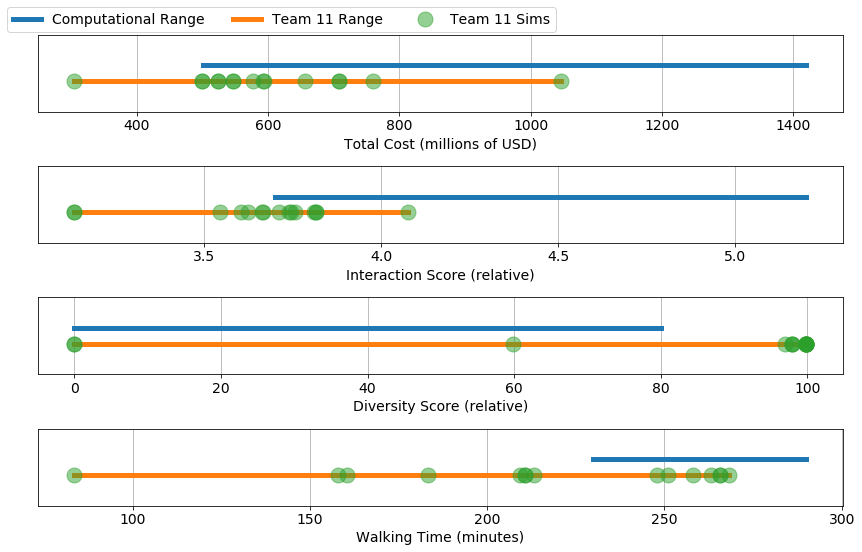

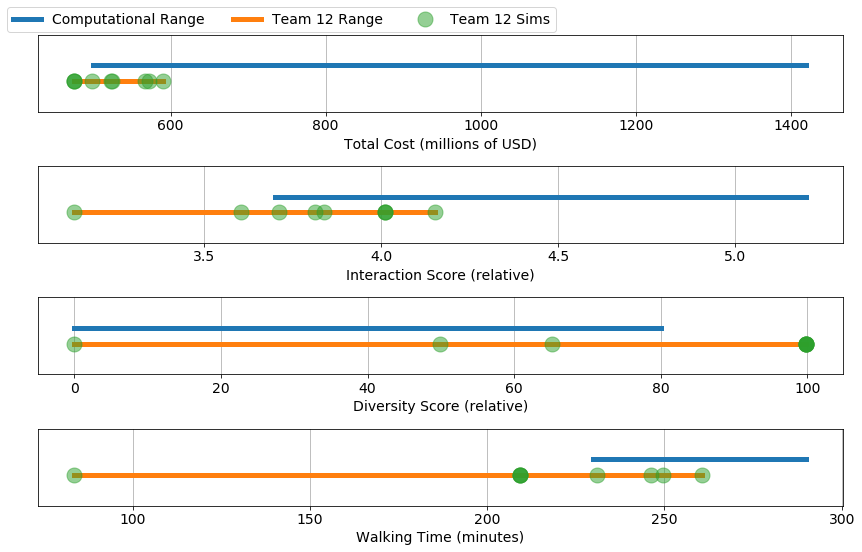

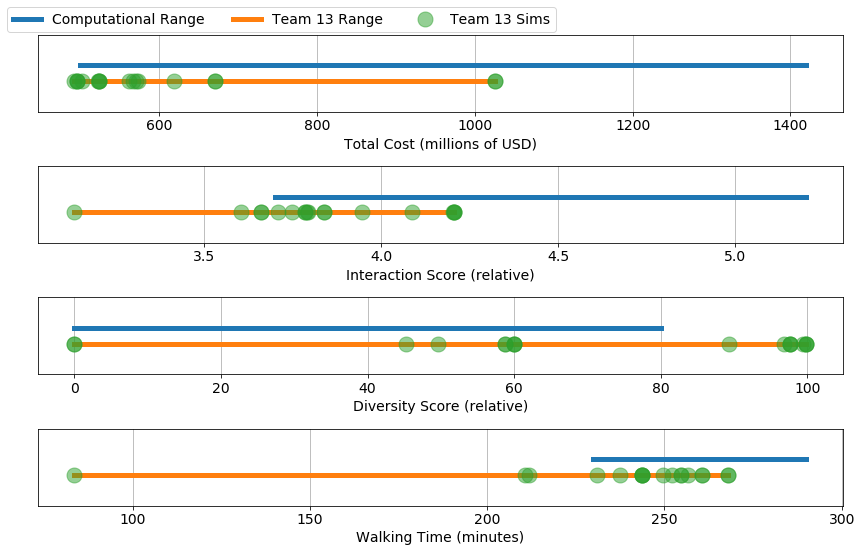

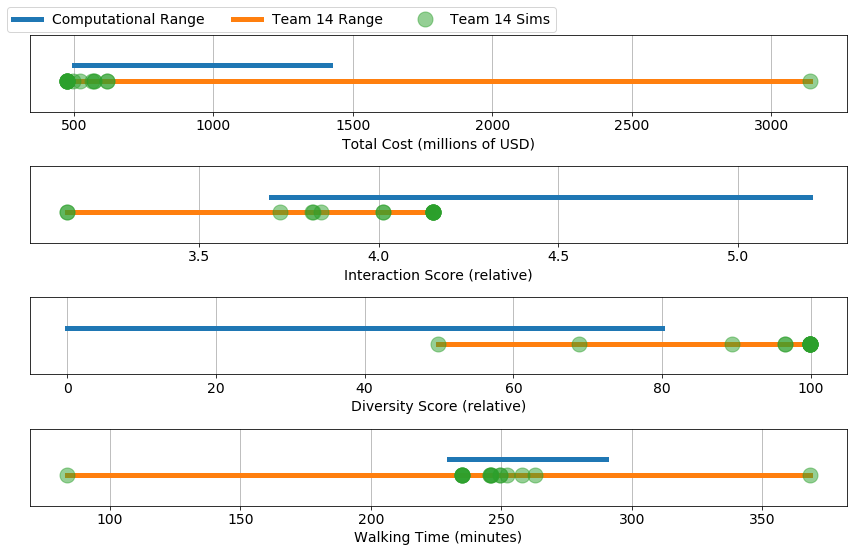

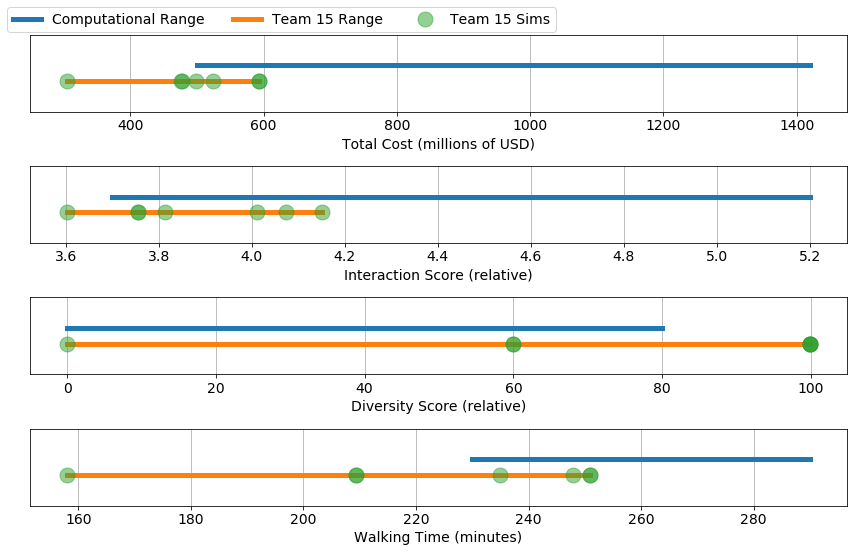

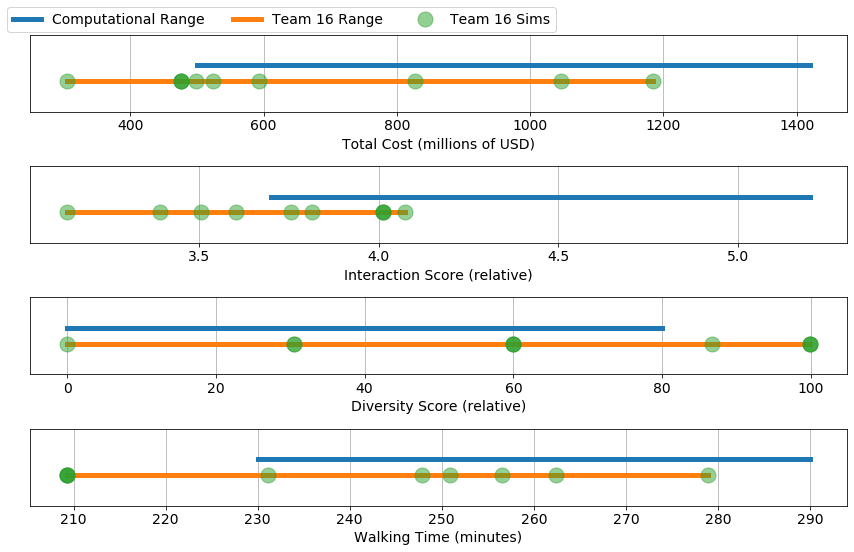

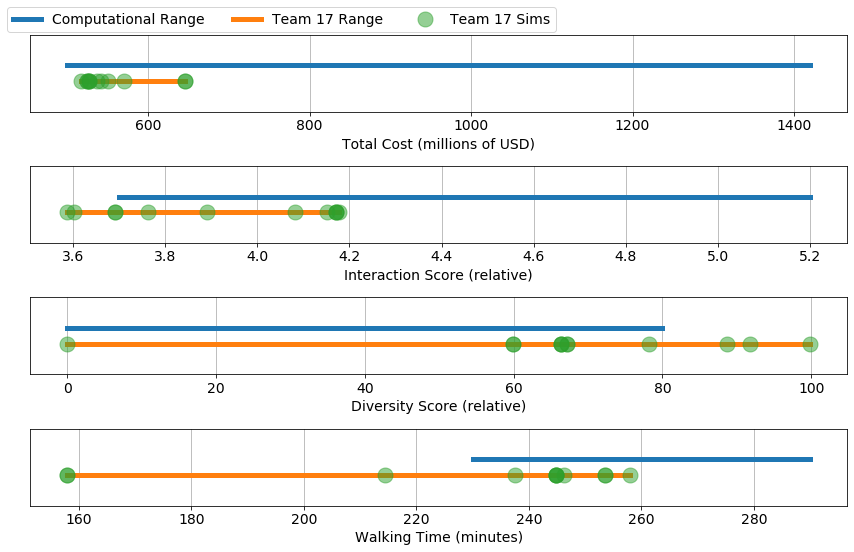

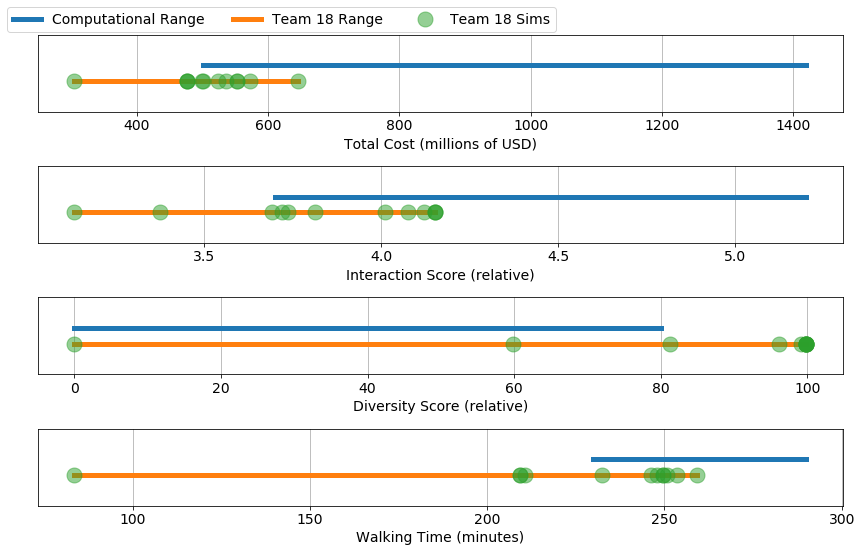

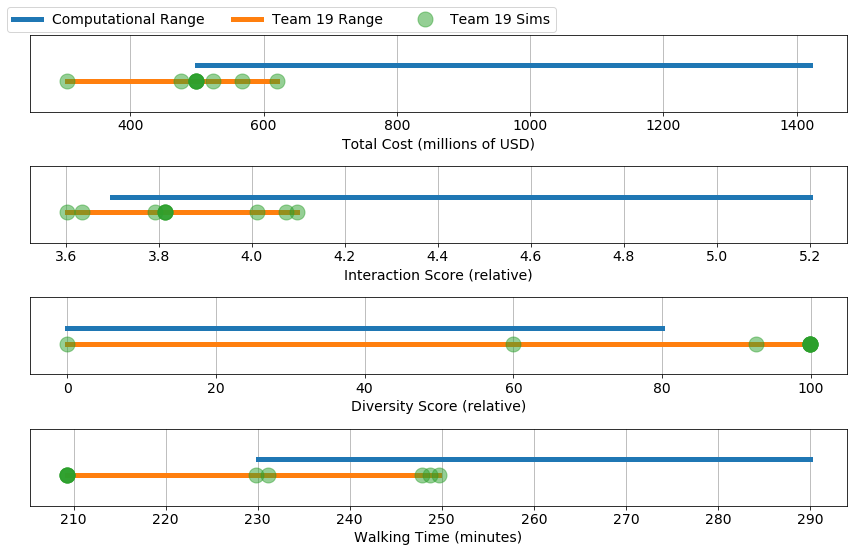

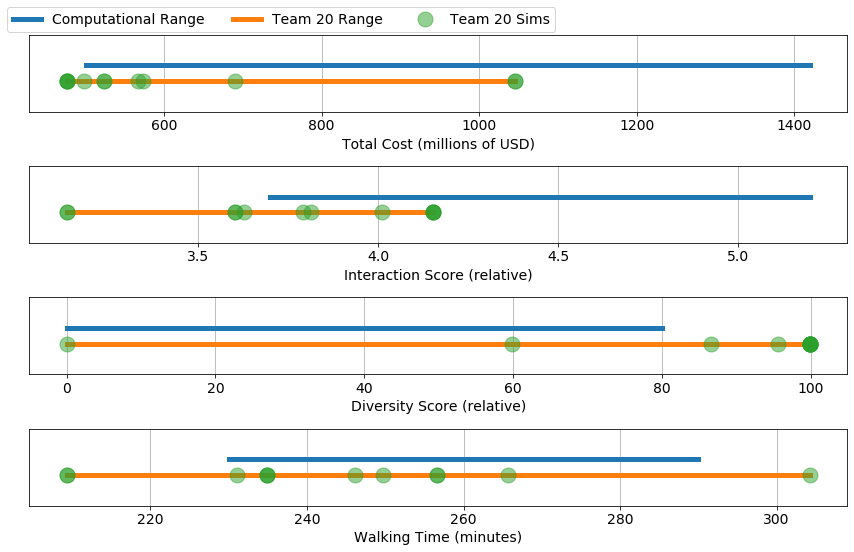

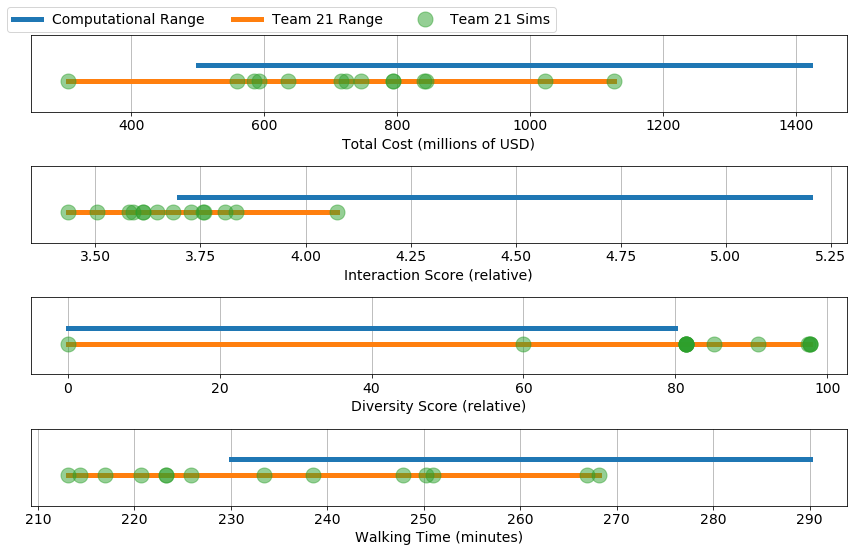

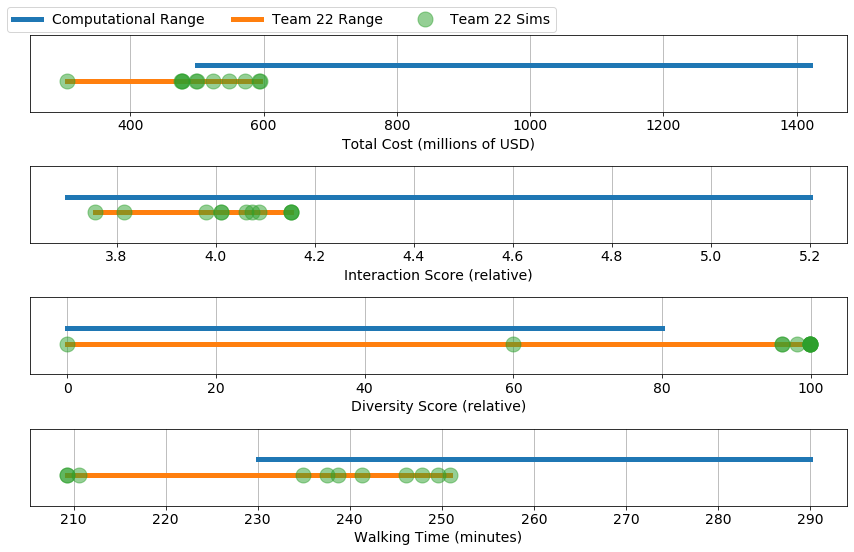

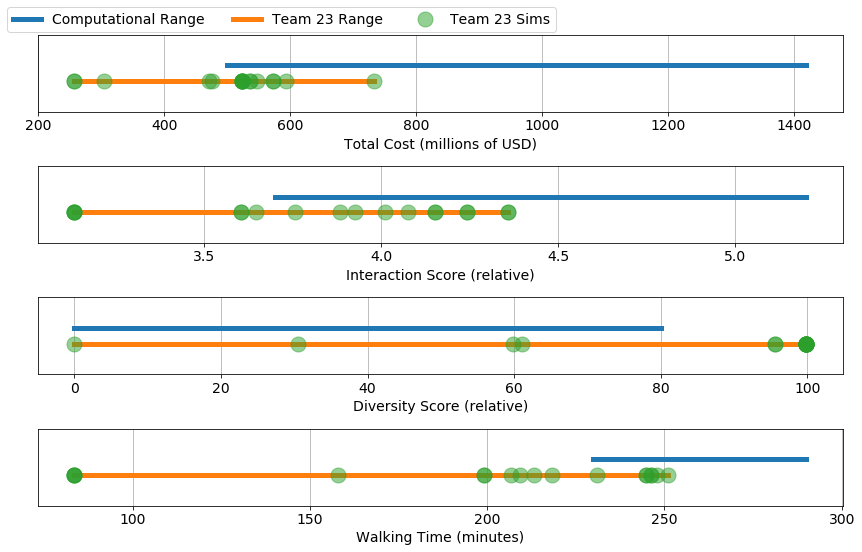

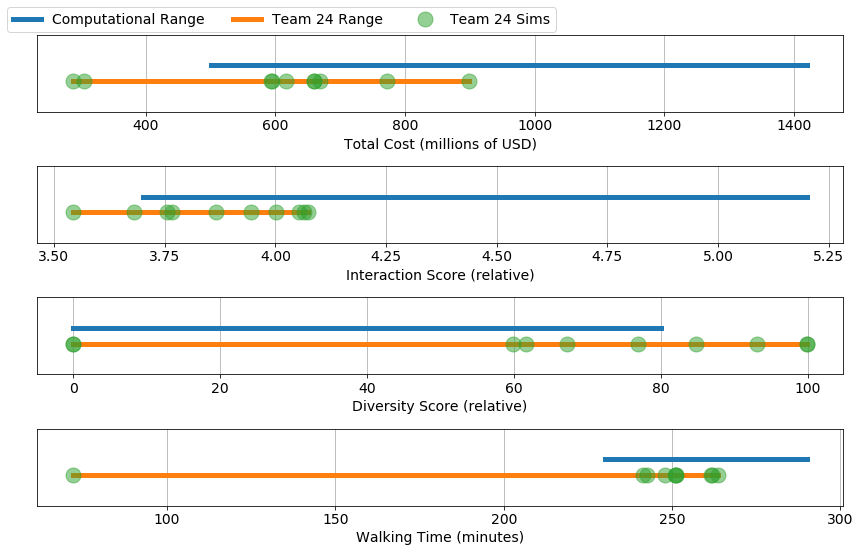

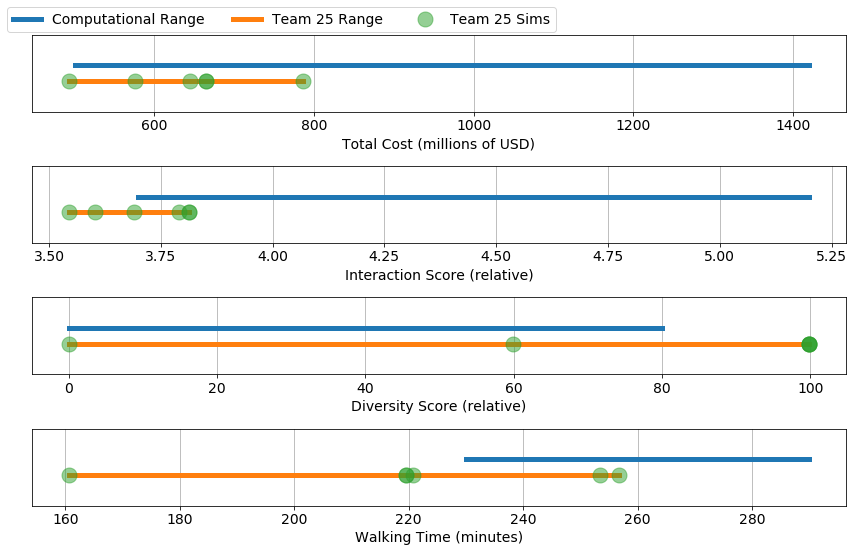

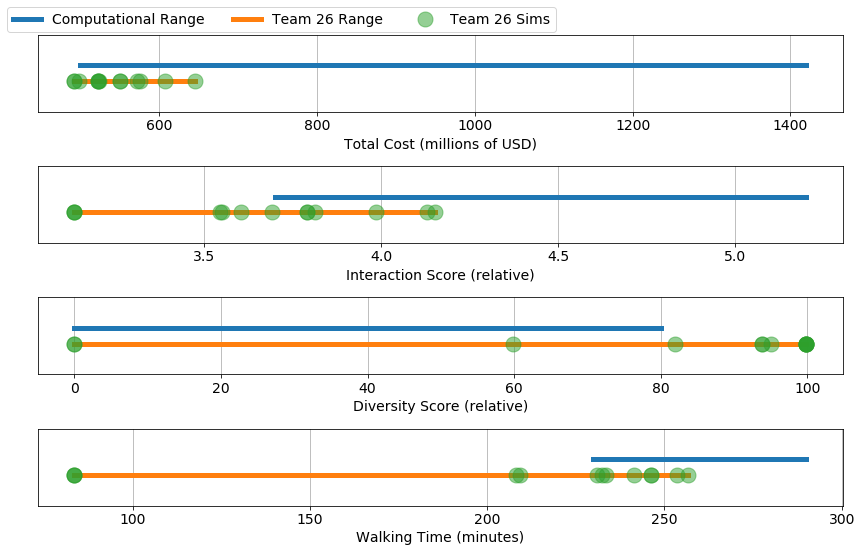

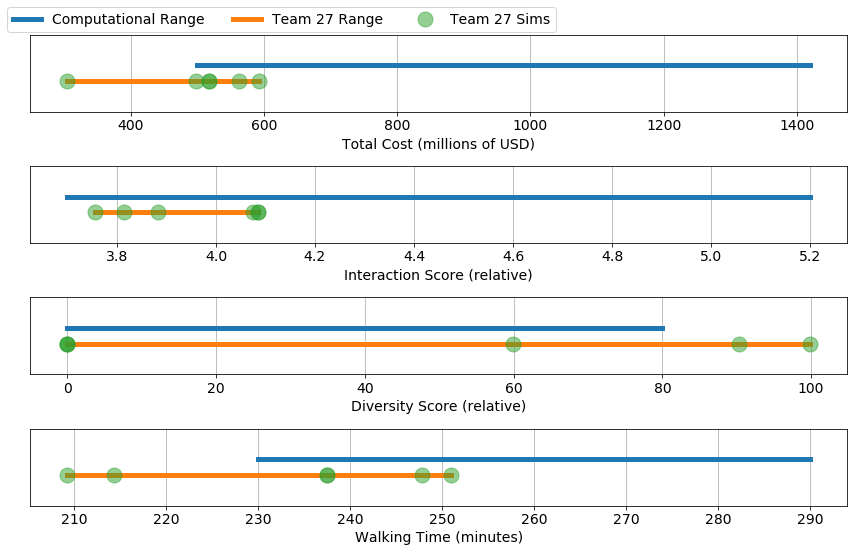

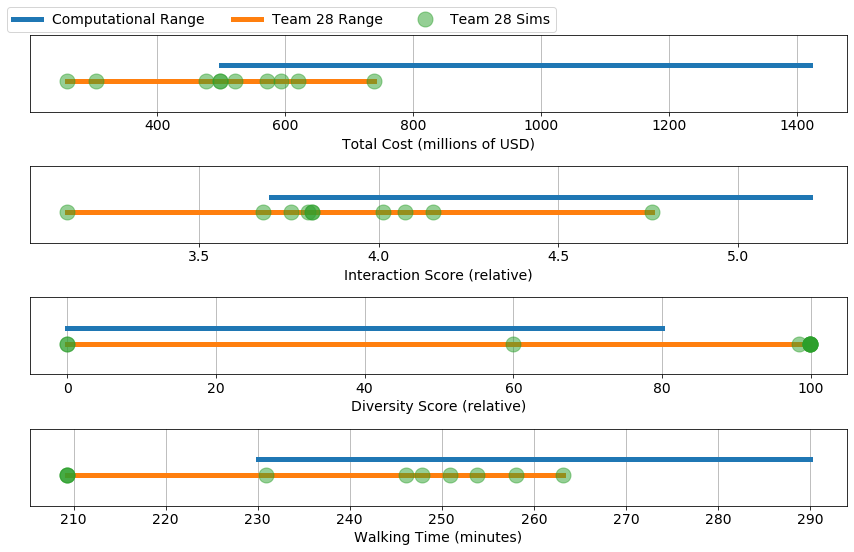

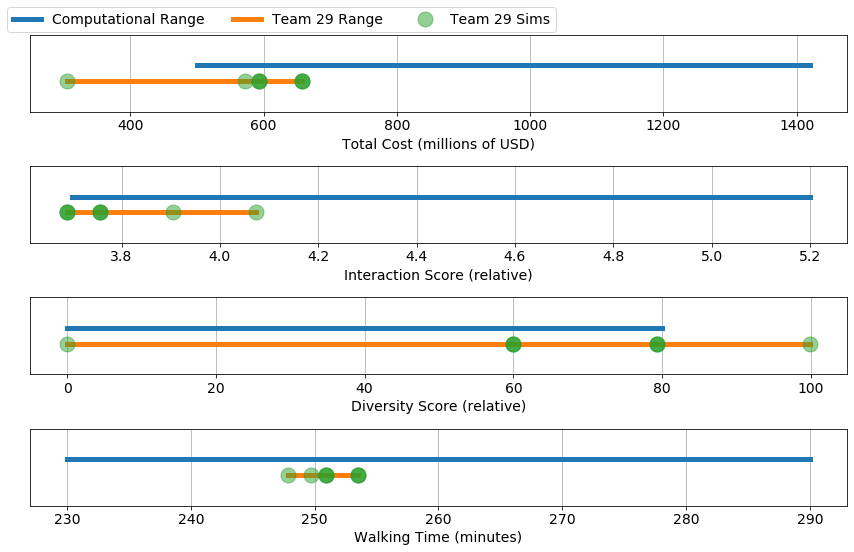

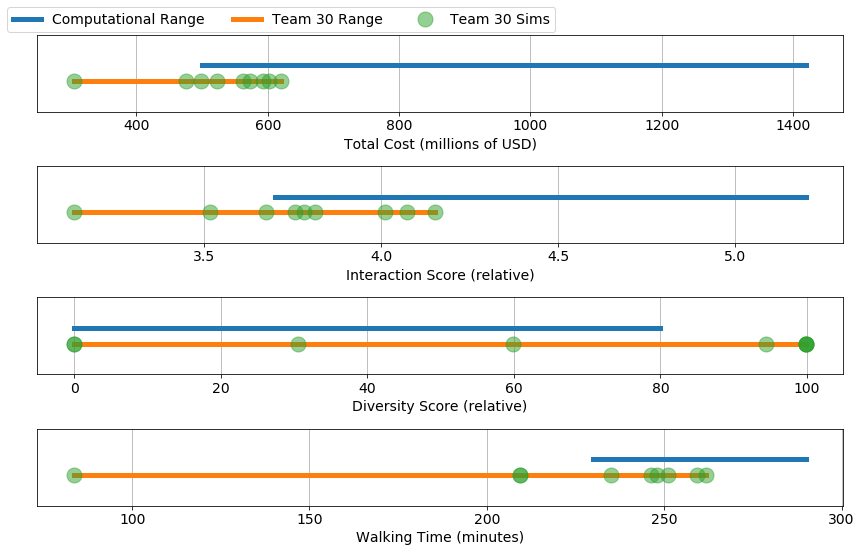

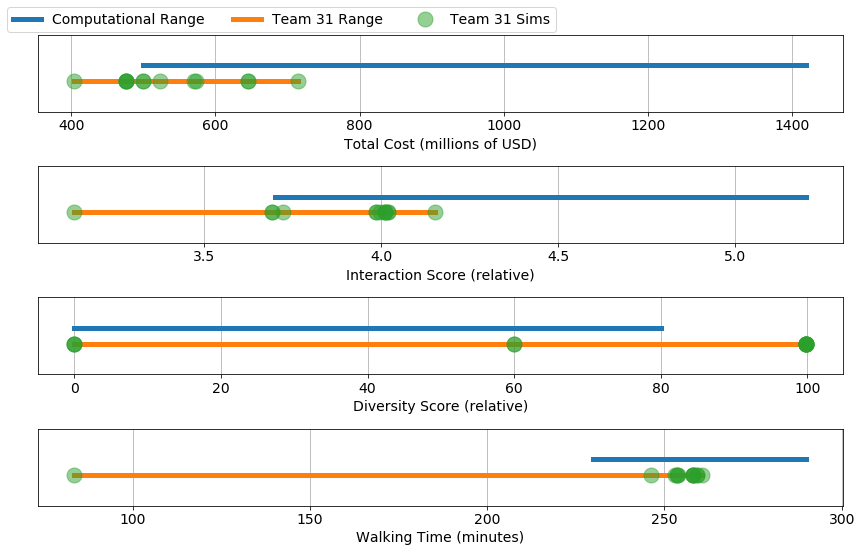

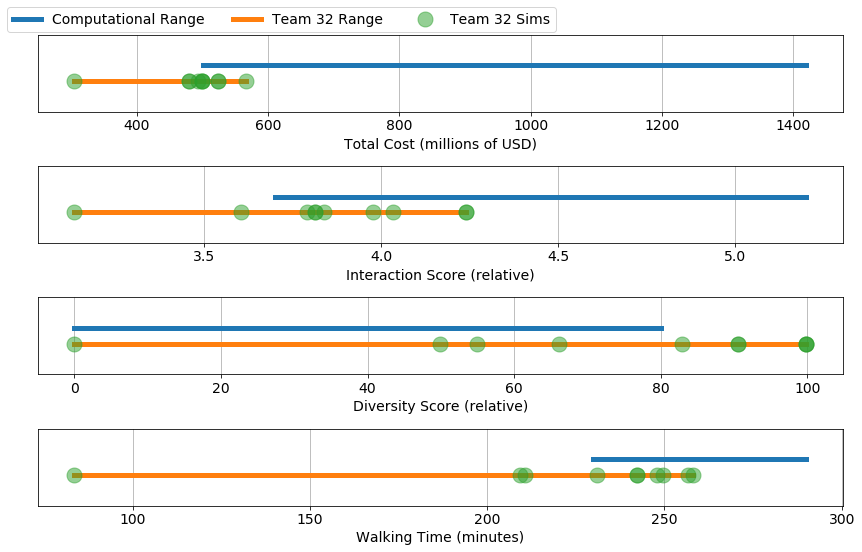

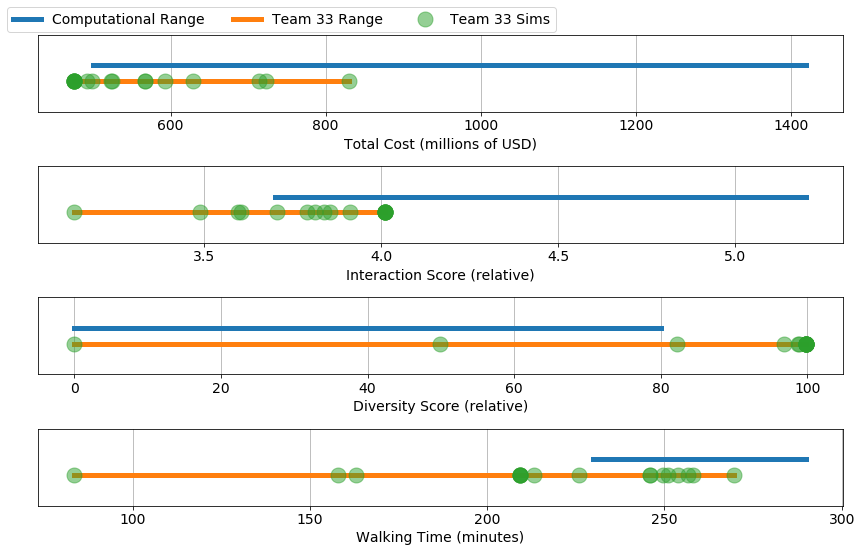

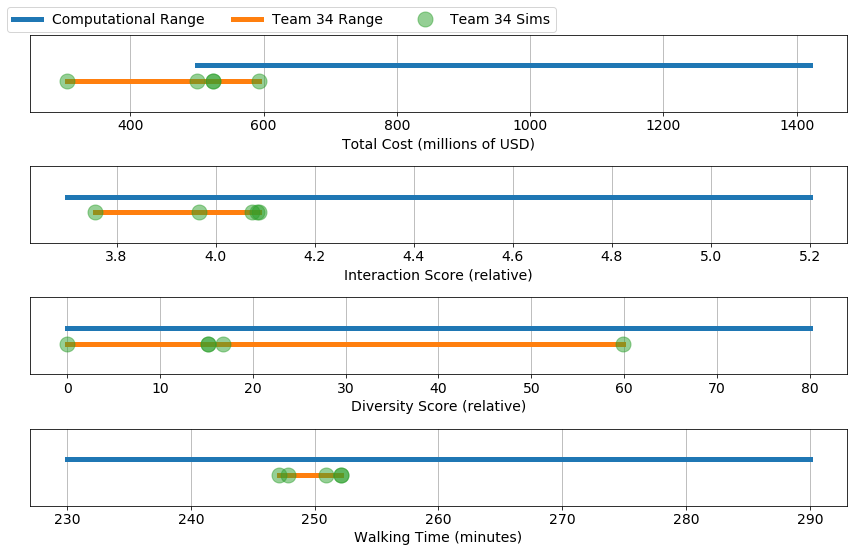

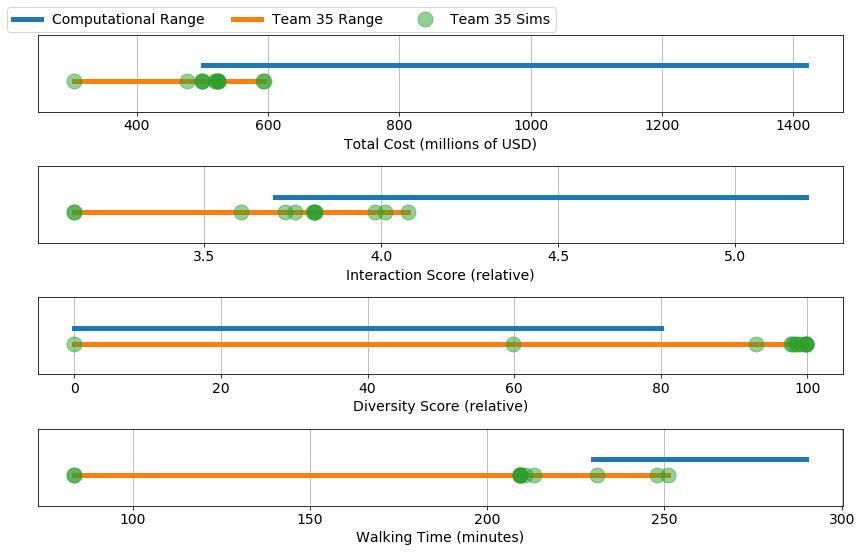

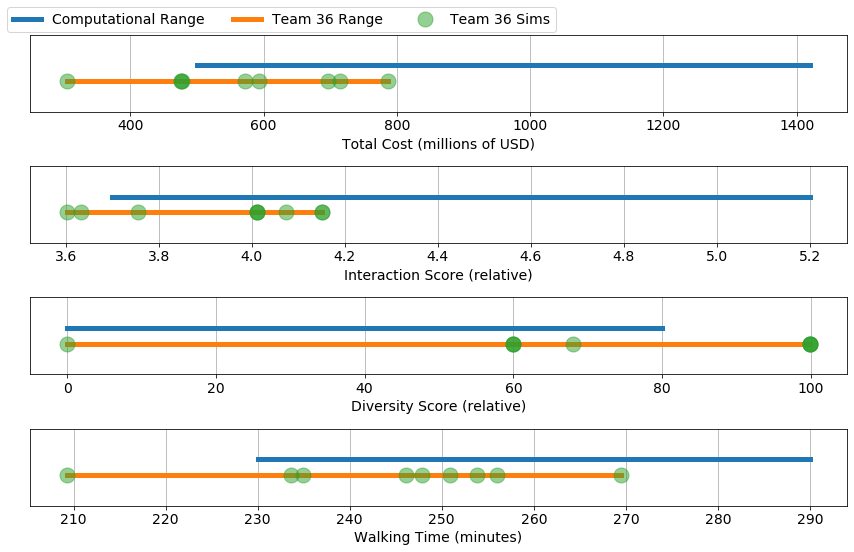

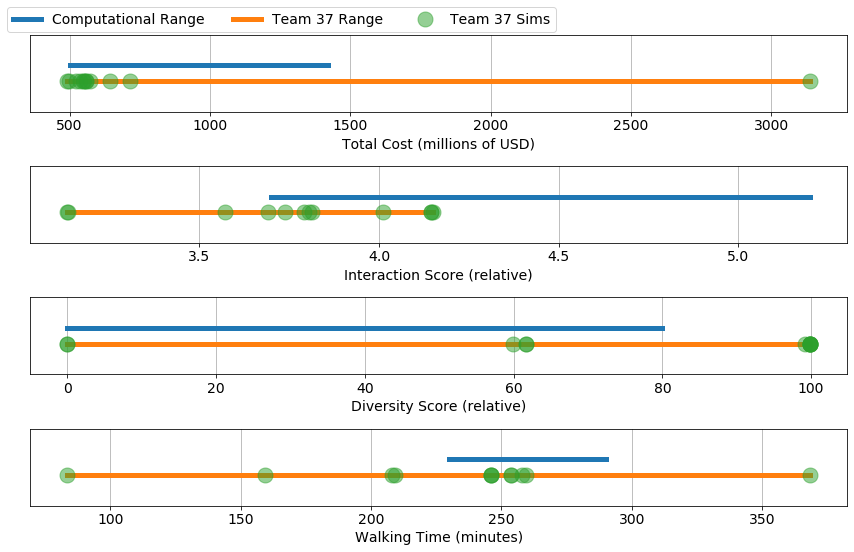

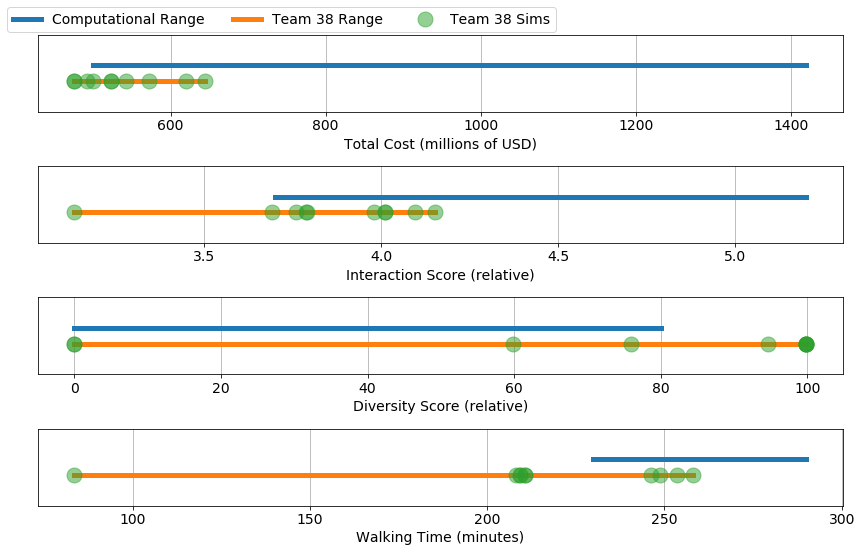

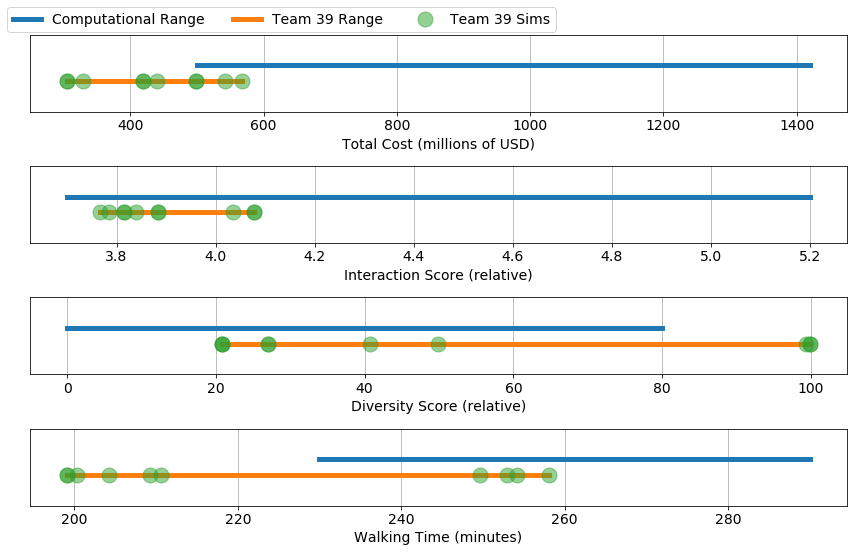

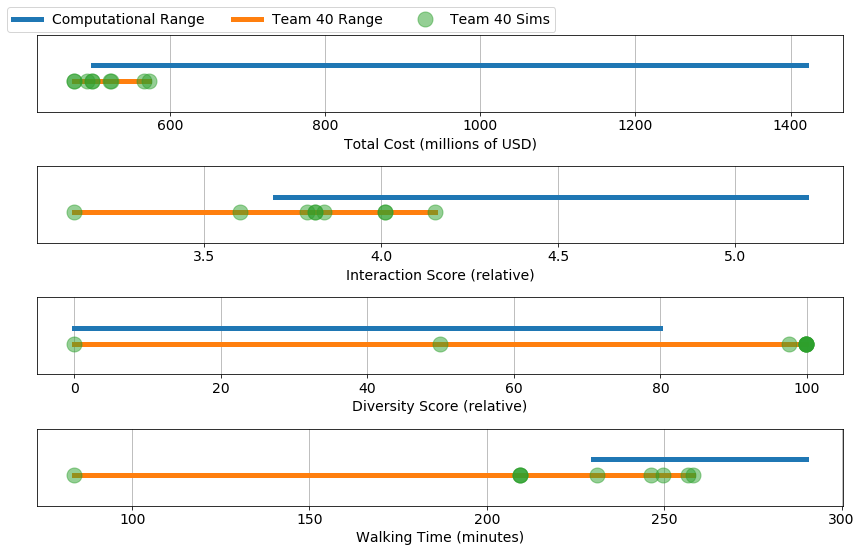

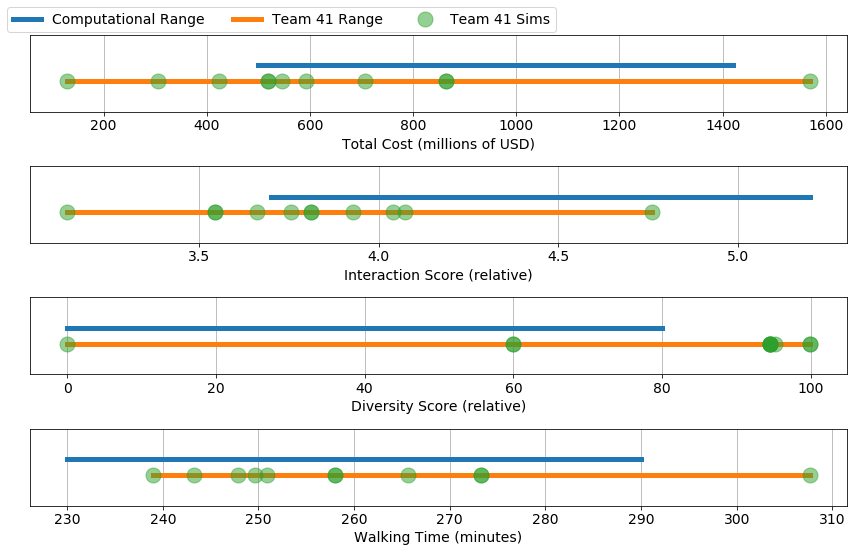

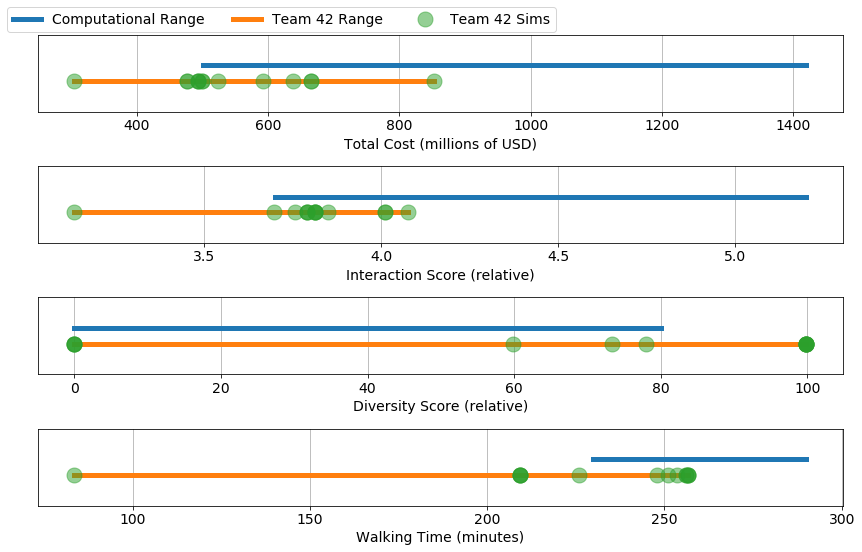

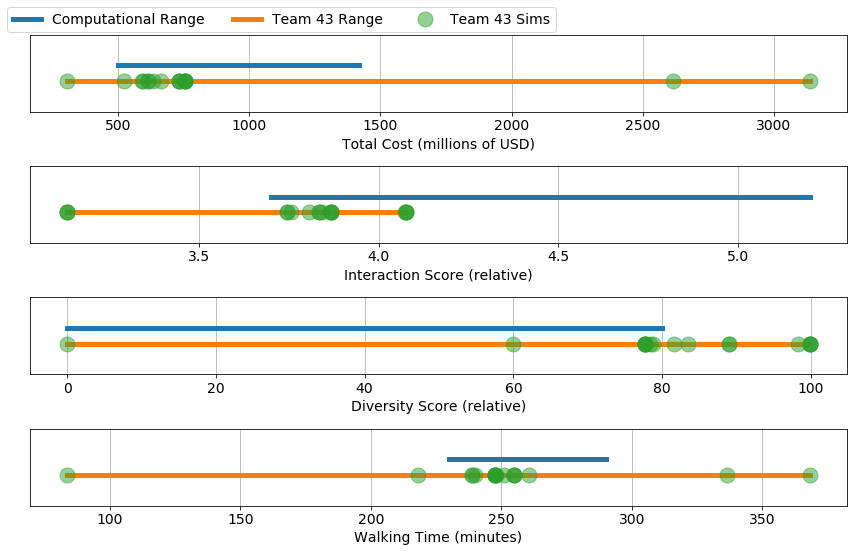

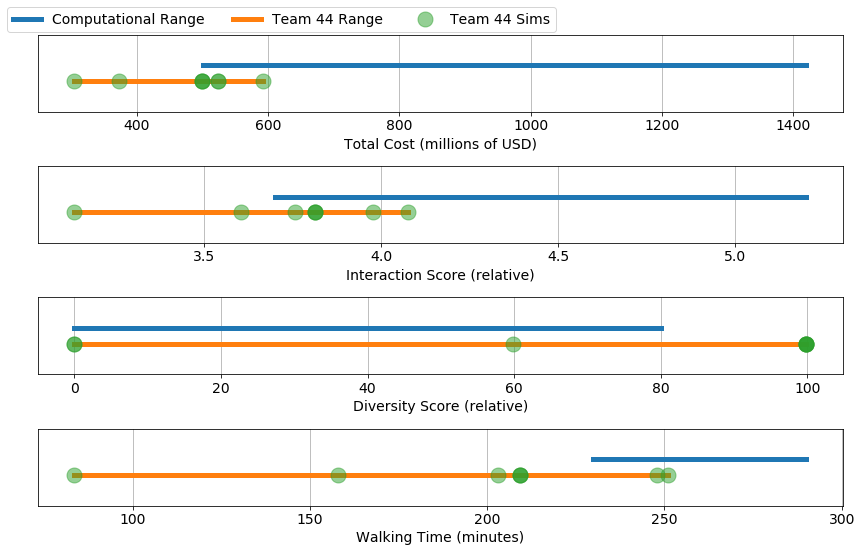

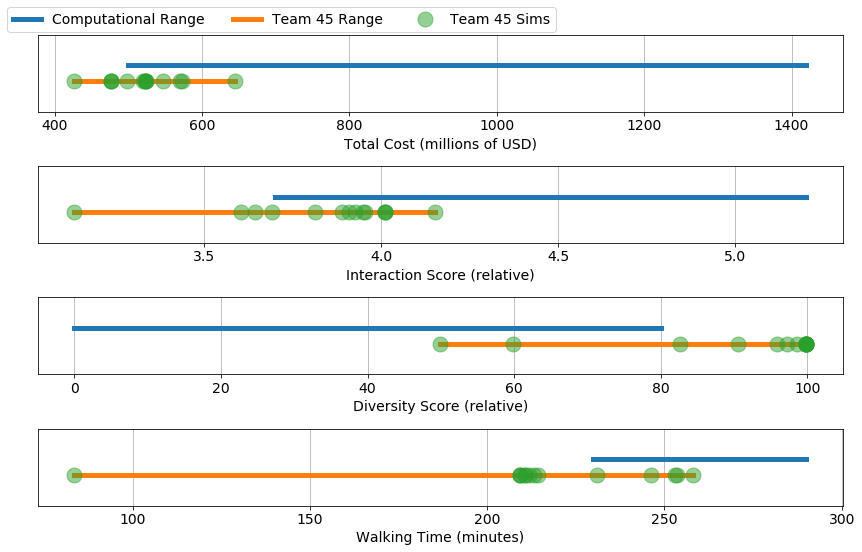

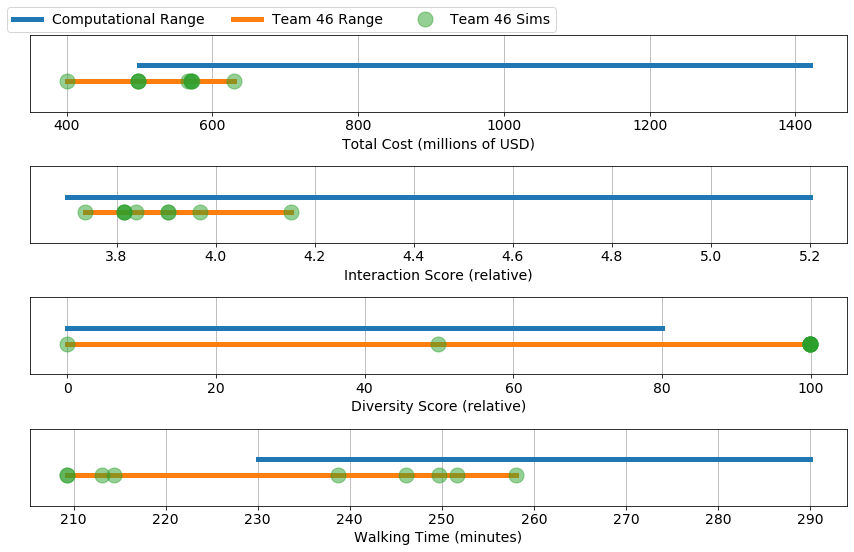

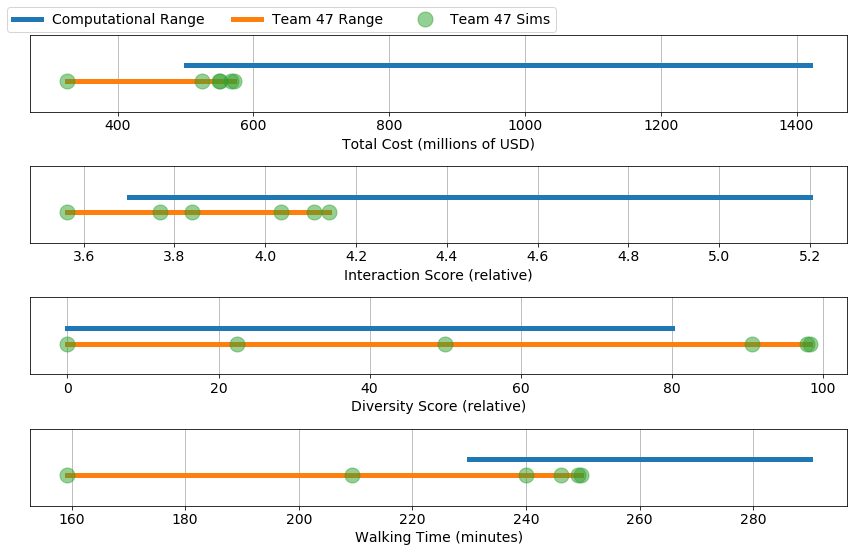

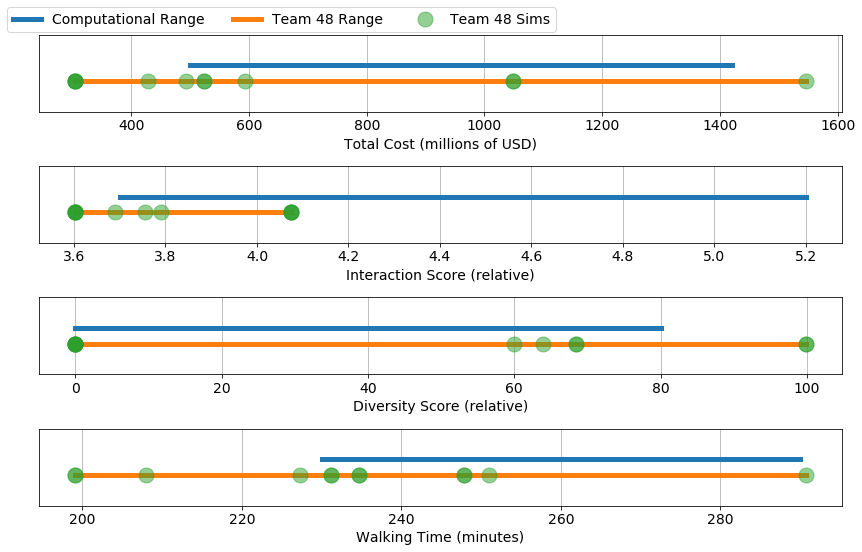

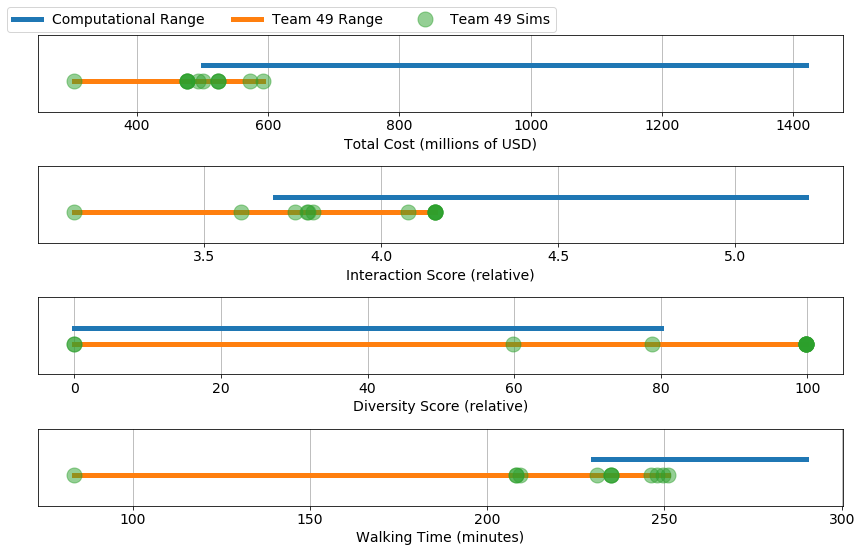

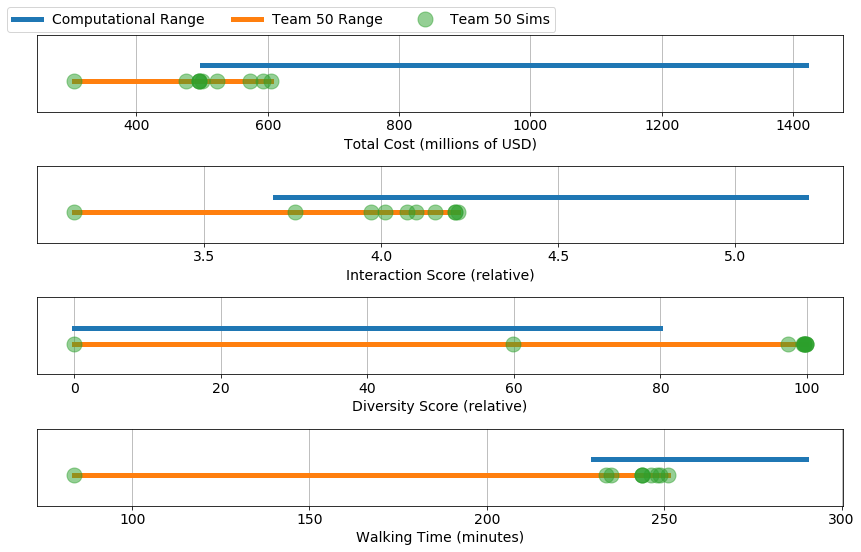

In [152]:
for team in range(1, 51):
    plot_team(team)